In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import plot_func as f

In [2]:
ds = xr.open_dataset('gridfile_test.nc')
ds2 = xr.open_dataset('erai_regrid_5x5.nc')
obs = xr.open_dataset('../GPS-RO__CP_LR_5x5_2007-2018.nc')

In [3]:
ds_slice = ds.sel(lat=slice(-20,20))
obs_slice = obs.sel(lat = slice(-20,20))
ds2_slice = ds2.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))

In [4]:
obs_mon = obs_slice.resample(time='M').mean()

In [55]:
era5_mean = ds_slice.mean(axis=(0,2))
era5_mean['lat'] = ds_slice.lat
obs_mean = obs_mon.mean(axis=(0,2))
obs_mean['lat'] = ds_slice.lat
erai_mean = ds2_slice.mean(axis=(0,2))
erai_mean['lat'] = ds_slice.lat

d1 = era5_mean.ctpt - obs_mean.CP_T
d2 = erai_mean.ctpt - obs_mean.CP_T
d3 = era5_mean.ctpz - obs_mean.CP_z
d4 = erai_mean.ctpz - obs_mean.CP_z

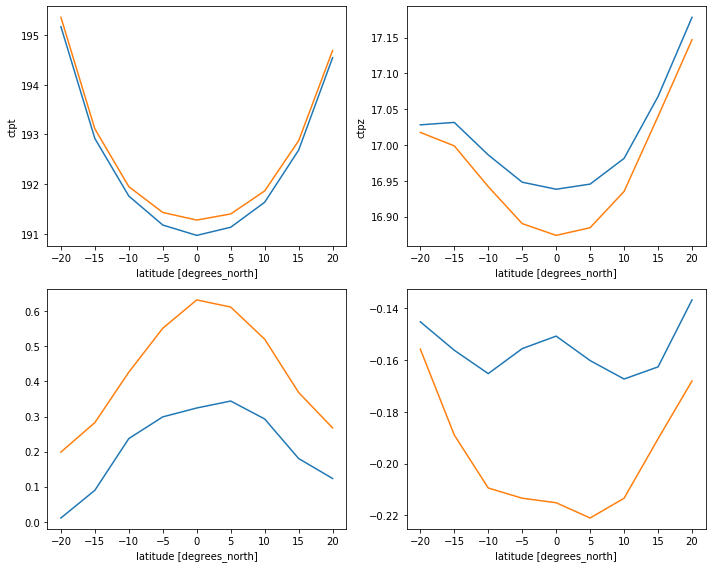

In [56]:
f, axs = plt.subplots(2,2,figsize=(10,8))

era5_mean.ctpt.plot(ax=axs[0,0])
erai_mean.ctpt.plot(ax=axs[0,0])

era5_mean.ctpz.plot(ax=axs[0,1])
erai_mean.ctpz.plot(ax=axs[0,1])

d1.plot(ax=axs[1,0])
d2.plot(ax=axs[1,0])

d3.plot(ax=axs[1,1])
d4.plot(ax=axs[1,1])

plt.tight_layout()

In [57]:
d11 = era5_mean.tpt - obs_mean.LR_T
d22 = erai_mean.tpt - obs_mean.LR_T
d33 = era5_mean.tpz - obs_mean.LR_z
d44 = erai_mean.tpz - obs_mean.LR_z

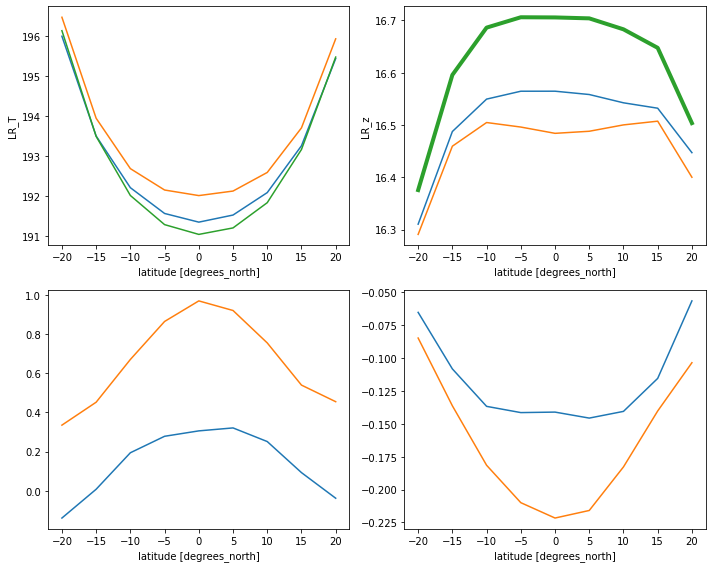

In [64]:
f, axs = plt.subplots(2,2,figsize=(10,8))

era5_mean.tpt.plot(ax=axs[0,0])
erai_mean.tpt.plot(ax=axs[0,0])
obs_mean.LR_T.plot(ax=axs[0,0])

era5_mean.tpz.plot(ax=axs[0,1])
erai_mean.tpz.plot(ax=axs[0,1])
obs_mean.LR_z.plot(ax=axs[0,1], lw=4)

d11.plot(ax=axs[1,0])
d22.plot(ax=axs[1,0])

d33.plot(ax=axs[1,1])
d44.plot(ax=axs[1,1])

plt.tight_layout()

